In [1]:
import pandas as pd
import numpy as np
import missingno as ms
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('../input/bigmart-sales-prediction/Train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


shape (8523, 12)
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


<AxesSubplot:>

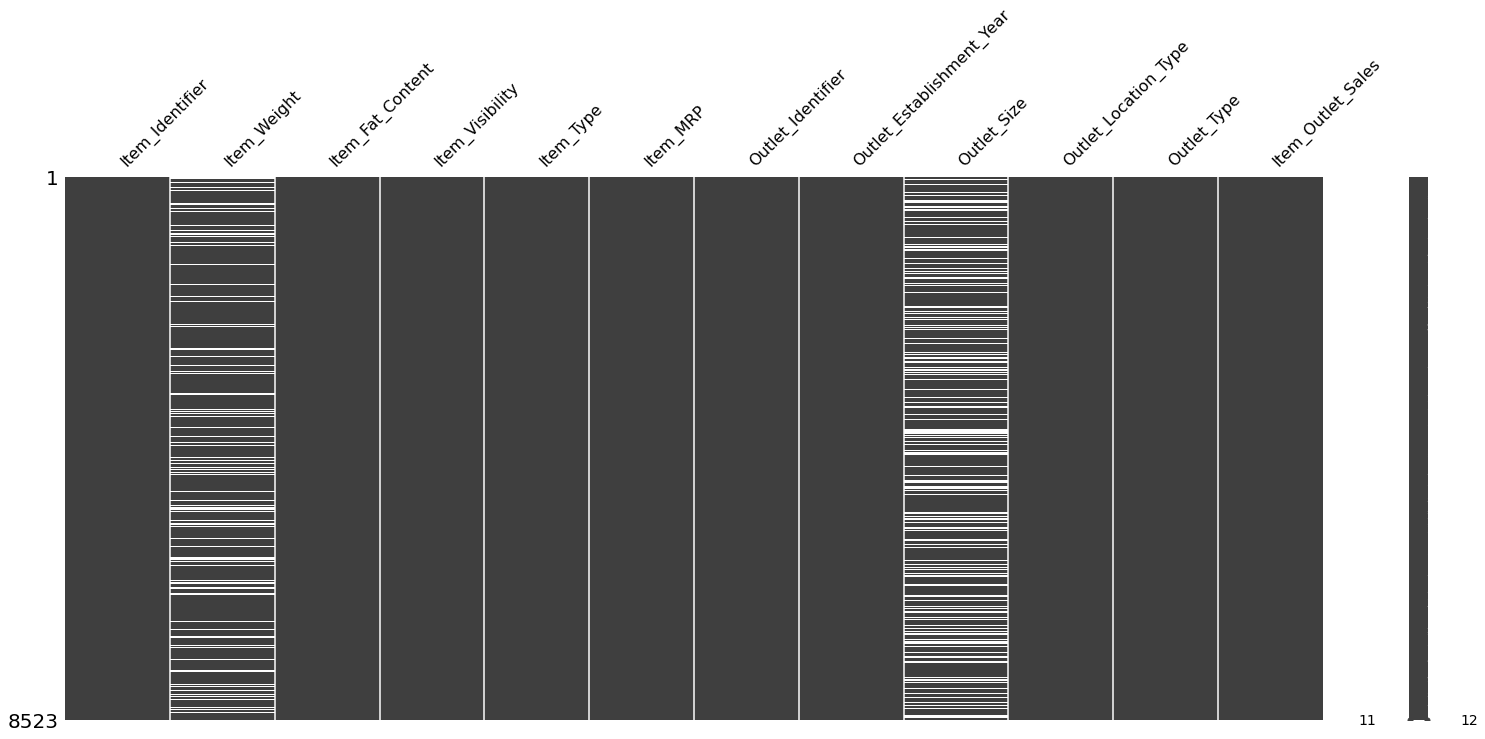

In [3]:
print('shape',data.shape)
print(data.isnull().sum())
ms.matrix(data)

In [4]:
data['Item_Weight'].mean()
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())


In [5]:

data['Outlet_Size'] = data['Outlet_Size'].fillna("others")
data['Outlet_Size'].unique()

array(['Medium', 'others', 'High', 'Small'], dtype=object)

In [6]:
#now we dont have any missing values in dataset
#print(data.isnull().sum())


print(data['Outlet_Size'].value_counts())


Medium    2793
others    2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [7]:
print(data['Item_Type'].value_counts())

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


In [8]:
print(data['Outlet_Type'].value_counts())

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [9]:
#data['Item_Identifier'].unique()
#data= data.drop('Item_Identifier', axis =1)

EDA

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

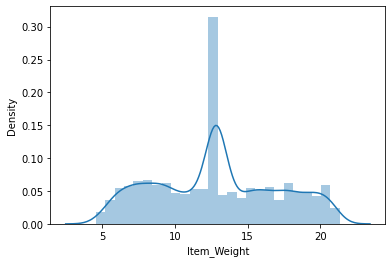

In [10]:
sns.distplot(data['Item_Weight'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

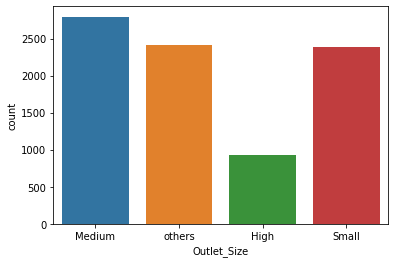

In [11]:
sns.countplot(data['Outlet_Size'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

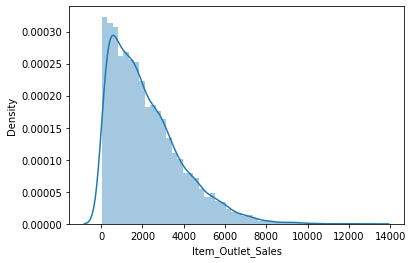

In [12]:
sns.distplot(data['Item_Outlet_Sales'])

In [13]:
#converting to log
data['Item_Outlet_Sales'] = np.log(1+data['Item_Outlet_Sales'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

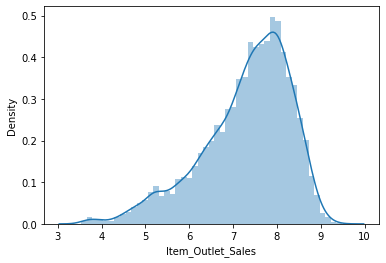

In [14]:
sns.distplot(data['Item_Outlet_Sales'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

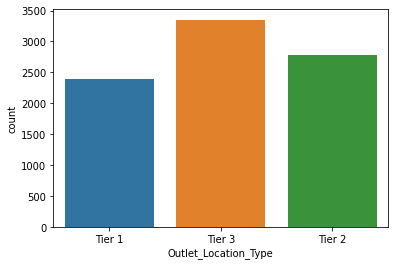

In [15]:
sns.countplot(data["Outlet_Location_Type"])

In [16]:
#dealing with categorical data
cat_data = data.select_dtypes('object')
cat_data.head()
num_data = data.drop(cat_data,axis =1)
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,8.225808
1,5.92,0.019278,48.2692,2009,6.096776
2,17.50,0.016760,141.6180,1999,7.648868
3,19.20,0.000000,182.0950,1998,6.597664
4,8.93,0.000000,53.8614,1987,6.903451


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_data = cat_data.apply(le.fit_transform)

cat_data.head()

new_data = cat_data.join(num_data)
new_data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,156,1,4,9,1,0,1,9.30,0.016047,249.8092,1999,8.225808
1,8,2,14,3,1,2,2,5.92,0.019278,48.2692,2009,6.096776
2,662,1,10,9,1,0,1,17.50,0.016760,141.6180,1999,7.648868
3,1121,2,6,0,3,2,0,19.20,0.000000,182.0950,1998,6.597664
4,1297,1,9,1,0,2,1,8.93,0.000000,53.8614,1987,6.903451


In [18]:
x= new_data.iloc[:,:-1]
y= new_data.iloc[:,-1]
x.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,156,1,4,9,1,0,1,9.30,0.016047,249.8092,1999
1,8,2,14,3,1,2,2,5.92,0.019278,48.2692,2009
2,662,1,10,9,1,0,1,17.50,0.016760,141.6180,1999
3,1121,2,6,0,3,2,0,19.20,0.000000,182.0950,1998
4,1297,1,9,1,0,2,1,8.93,0.000000,53.8614,1987


In [19]:
x= x.drop(columns = ['Item_Identifier','Outlet_Establishment_Year','Outlet_Identifier'])

In [20]:
x["Item_Visibility"] = x["Item_Visibility"].replace([0] , [x["Item_Visibility"].mean()])

In [21]:
x.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP
0,1,4,1,0,1,9.30,0.016047,249.8092
1,2,14,1,2,2,5.92,0.019278,48.2692
2,1,10,1,0,1,17.50,0.016760,141.6180
3,2,6,3,2,0,19.20,0.066132,182.0950
4,1,9,0,2,1,8.93,0.066132,53.8614


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state =0)

In [23]:
y_train.shape

(5966,)

In [24]:
# running models 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def train(model,x,y):
    model.fit(x,y)
    predict = model.predict(x)

    cross_val = cross_val_score(model,x,y, scoring ='neg_mean_squared_error', cv=5)
    cross_val = np.abs(np.mean(cross_val))
    
    print("cv score = ",cross_val)
    

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


model score 0.5263780831628482


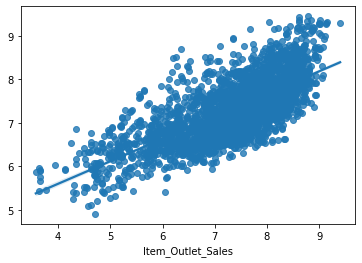

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

cross val negative mean score -0.472372837389403


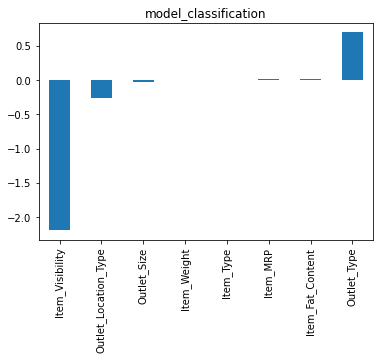

In [25]:
from sklearn.linear_model import LinearRegression , Ridge,Lasso


model = LinearRegression(normalize =True)
model.fit(x_train,y_train)
predict = model.predict(x_test)
best_score = model.score(x_test,y_test)
print("model score",best_score)
sns.regplot(y_test,predict)
plt.show()

cross_val = cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=5)

print('cross val negative mean score', cross_val.mean())
coef= pd.Series(model.coef_ ,x_train.columns).sort_values()
coef.plot(kind ='bar', title = 'model_classification')
plt.show()

cv score =  0.6181243490479906
model score = 0.38384101124393055


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

<AxesSubplot:title={'center':'model_classification'}>

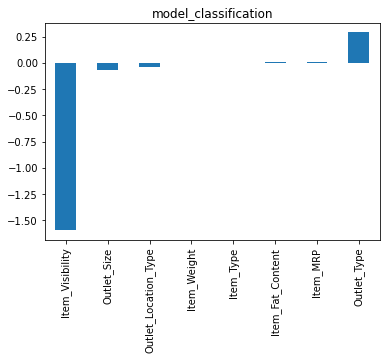

In [26]:
model = Ridge(normalize = True)
train(model,x_train,y_train)

model.fit(x_train,y_train)
print('model score =',model.score(x_test,y_test))

coef= pd.Series(model.coef_ ,x_train.columns).sort_values()
coef.plot(kind ='bar', title = 'model_classification')

model score = 0.2538352830427828
cv score =  0.753489931597371


<AxesSubplot:title={'center':'model_classification'}>

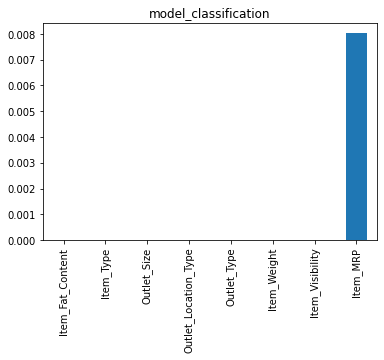

In [27]:
model = Lasso()

model.fit(x_train,y_train)
print('model score =',model.score(x_test,y_test))

train(model,x_train,y_train)
coef= pd.Series(model.coef_ ,x_train.columns).sort_values()
coef.plot(kind ='bar', title = 'model_classification')

model score = 0.44423447978748276
cv score =  0.5563784208015792


<AxesSubplot:title={'center':'model_classification'}>

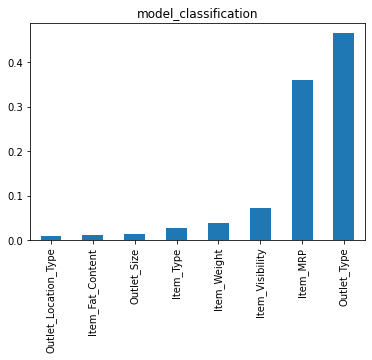

In [28]:
from sklearn.tree import DecisionTreeRegressor
model =DecisionTreeRegressor()

model.fit(x_train,y_train)
print('model score =',model.score(x_test,y_test))

train(model,x_train,y_train)
coef= pd.Series(model.feature_importances_,x_train.columns).sort_values()
coef.plot(kind ='bar', title = 'model_classification')

hyperparameter tuning

In [29]:
from sklearn.model_selection import RandomizedSearchCV

max_features =['auto','sqrt']
max_depth = [int(x) for x in np.linspace(1,30,6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10] 

grid_search = { 'max_features' : max_features , 'max_depth': max_depth ,'min_samples_split' : min_samples_split , 'min_samples_leaf' : min_samples_leaf }
print(grid_search)


{'max_features': ['auto', 'sqrt'], 'max_depth': [1, 6, 12, 18, 24, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [30]:
#random forest regressor 
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor()

rscv = RandomizedSearchCV(estimator = rf , param_distributions = grid_search , scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5,verbose = 2, random_state = 20)
rscv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=24, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   2.2s
[CV] END max_depth=24, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   2.2s
[CV] END max_depth=24, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   2.2s
[CV] END max_depth=24, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   2.2s
[CV] END max_depth=24, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   2.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10; total time=   0.5s
[CV] END max_dept

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [1, 6, 12, 18, 24, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=20, scoring='neg_mean_squared_error',
                   verbose=2)

{'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 6}
-0.2693733030188553


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

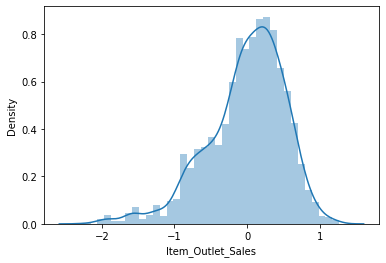

In [31]:
print(rscv.best_params_)
print(rscv.best_score_)
predict = rscv.predict(x_test)
sns.distplot(y_test-predict)